### **Pandas**

Pandas is an Python package that is widely used for data data analysis and machine learning.

In [1]:
import pandas as pd

First data type we will try to use is one dimensional arrays ("columns") called `Series`:

In [2]:
mylist = [2, 8, 99,1]

myvar = pd.Series(mylist)

print(myvar)

0     2
1     8
2    99
3     1
dtype: int64


By default, the data gets labeled by indexes starting from 0, otherwise you can specify the labels:

In [3]:
#print(myvar[0])
myvar2 = pd.Series(mylist, index = ["a", "b", "c","d"])
print(myvar2)
#print(myvar2[0]) #but you can still use the index to access
#print(myvar2["a"])

a     2
b     8
c    99
d     1
dtype: int64


You can also create "series" from a dictionary:

In [4]:
mydict = {"key1": 888, "key2": 123, "key3": 777}

myvar = pd.Series(mydict, index = ["key1","key3"]) #index is optional

print(myvar)

key1    888
key3    777
dtype: int64


To work with tables rather than vectors, we need to use `DataFrame`:

In [5]:
mydataset = {
  'cats': ["grey", "black", "white"],
  'age': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)

print(myvar) 

    cats  age
0   grey    3
1  black    7
2  white    2


To access the rows, use `loc`:

In [6]:
myvar["cats"]

0     grey
1    black
2    white
Name: cats, dtype: object

In [7]:
myvar.loc[2] #a named index will work as well

cats    white
age         2
Name: 2, dtype: object

In [8]:
type(myvar.loc[2])

pandas.core.series.Series

How to load files:

In [9]:
df = pd.read_csv('data/example.csv', index_col=0)

print(df) 

        course1  course2  course3  course4
name                                      
Marie        24       18       30       20
John         18       27       29       27
Kati         21       24       28       27
Olaf         30       30       29       30
Mark         24       25       27       21
Olga         23       26       30       30
Jean         18       28       26       24
Alex         19       20       27       27
Pier         24       29       23       26
Bennet       24       25       26       30
Luis         20       20       18       18


You can control how many rows it prints:

In [10]:
pd.options.display.max_rows = 200
print(df)

        course1  course2  course3  course4
name                                      
Marie        24       18       30       20
John         18       27       29       27
Kati         21       24       28       27
Olaf         30       30       29       30
Mark         24       25       27       21
Olga         23       26       30       30
Jean         18       28       26       24
Alex         19       20       27       27
Pier         24       29       23       26
Bennet       24       25       26       30
Luis         20       20       18       18


Type `pd.read` and press `tab` to see what else it can read.

In [11]:
#pd.read

To have a quick look at what you've read, do:

In [12]:
pd.options.display.max_rows = 999 #to fix back from 3
print(df.head())
print(df.tail())
print(df.info())

       course1  course2  course3  course4
name                                     
Marie       24       18       30       20
John        18       27       29       27
Kati        21       24       28       27
Olaf        30       30       29       30
Mark        24       25       27       21
        course1  course2  course3  course4
name                                      
Jean         18       28       26       24
Alex         19       20       27       27
Pier         24       29       23       26
Bennet       24       25       26       30
Luis         20       20       18       18
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Marie to Luis
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   course1  11 non-null     int64
 1   course2  11 non-null     int64
 2   course3  11 non-null     int64
 3   course4  11 non-null     int64
dtypes: int64(4)
memory usage: 440.0+ bytes
None


We see that there are no null objects, if there were, we would probably need to delete them before analysing the data.

In [13]:
df2 = pd.read_csv('data/example_empty.csv', index_col=0)

print(df2) 

        course1  course2  course3  course4
name                                      
Marie      24.0     18.0       30       20
John       18.0     27.0       29       27
Kati       21.0     24.0       28       27
Olaf       30.0     30.0       29       30
Mark        NaN     25.0       27       21
Olga       23.0     26.0       30       30
Jean       18.0     28.0       26       24
Alex       19.0      NaN       27       27
Pier       24.0     29.0       23       26
Bennet     24.0     25.0       26       30
Luis       20.0     20.0       18       18


In [14]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Marie to Luis
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   course1  10 non-null     float64
 1   course2  10 non-null     float64
 2   course3  11 non-null     int64  
 3   course4  11 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes
None


Let's clean this data:

In [15]:
new_df2 = df2.dropna() #returns a new dataframe
print(new_df2)

        course1  course2  course3  course4
name                                      
Marie      24.0     18.0       30       20
John       18.0     27.0       29       27
Kati       21.0     24.0       28       27
Olaf       30.0     30.0       29       30
Olga       23.0     26.0       30       30
Jean       18.0     28.0       26       24
Pier       24.0     29.0       23       26
Bennet     24.0     25.0       26       30
Luis       20.0     20.0       18       18


In [16]:
df2.dropna(inplace = True) #deletes directly (you might not have space otherwise)
print(df2)

        course1  course2  course3  course4
name                                      
Marie      24.0     18.0       30       20
John       18.0     27.0       29       27
Kati       21.0     24.0       28       27
Olaf       30.0     30.0       29       30
Olga       23.0     26.0       30       30
Jean       18.0     28.0       26       24
Pier       24.0     29.0       23       26
Bennet     24.0     25.0       26       30
Luis       20.0     20.0       18       18


In [17]:
df2.drop("course4", axis='columns') #how to drop a column

,course1,course2,course3
name,,,
Marie,24.0,18.0,30
John,18.0,27.0,29
Kati,21.0,24.0,28
Olaf,30.0,30.0,29
Olga,23.0,26.0,30
Jean,18.0,28.0,26
Pier,24.0,29.0,23
Bennet,24.0,25.0,26
Luis,20.0,20.0,18


In [18]:
print(df.drop('Pier', axis='rows')) #how to drop a row

        course1  course2  course3  course4
name                                      
Marie        24       18       30       20
John         18       27       29       27
Kati         21       24       28       27
Olaf         30       30       29       30
Mark         24       25       27       21
Olga         23       26       30       30
Jean         18       28       26       24
Alex         19       20       27       27
Bennet       24       25       26       30
Luis         20       20       18       18


You can also fill the null values with something. For example, let's give 18 to students without marks:

In [19]:
df2 = pd.read_csv('data/example_empty.csv', index_col=0)
df2.fillna(18, inplace = True)
print(df2)

        course1  course2  course3  course4
name                                      
Marie      24.0     18.0       30       20
John       18.0     27.0       29       27
Kati       21.0     24.0       28       27
Olaf       30.0     30.0       29       30
Mark       18.0     25.0       27       21
Olga       23.0     26.0       30       30
Jean       18.0     28.0       26       24
Alex       19.0     18.0       27       27
Pier       24.0     29.0       23       26
Bennet     24.0     25.0       26       30
Luis       20.0     20.0       18       18


Let's edit more:

In [20]:
df["course1"] = df["course1"].replace(18, "failed")
print(df)

       course1  course2  course3  course4
name                                     
Marie       24       18       30       20
John    failed       27       29       27
Kati        21       24       28       27
Olaf        30       30       29       30
Mark        24       25       27       21
Olga        23       26       30       30
Jean    failed       28       26       24
Alex        19       20       27       27
Pier        24       29       23       26
Bennet      24       25       26       30
Luis        20       20       18       18


### **Basic statistics**

In [21]:
df = pd.read_csv('data/example.csv', index_col=0)
df.describe()

,course1,course2,course3,course4
count,11.000000,11.000000,11.000000,11.000000
mean,22.272727,24.727273,26.636364,25.454545
std,3.552208,3.926599,3.529100,4.203894
min,18.000000,18.000000,18.000000,18.000000
25%,19.500000,22.000000,26.000000,22.500000
50%,23.000000,25.000000,27.000000,27.000000
75%,24.000000,27.500000,29.000000,28.500000
max,30.000000,30.000000,30.000000,30.000000


In [22]:
df.mean() #column average

course1    22.272727
course2    24.727273
course3    26.636364
course4    25.454545
dtype: float64

In [23]:
df["course1"].mean() #column average

np.float64(22.272727272727273)

In [24]:
df.mean(axis=1) #rows average

name
Marie     23.00
John      25.25
Kati      25.00
Olaf      29.75
Mark      24.25
Olga      27.25
Jean      24.00
Alex      23.25
Pier      25.50
Bennet    26.25
Luis      19.00
dtype: float64

This will add a new column with the average by rows:

In [25]:
df["mean"]=df.mean(axis=1)
print(df)

        course1  course2  course3  course4   mean
name                                             
Marie        24       18       30       20  23.00
John         18       27       29       27  25.25
Kati         21       24       28       27  25.00
Olaf         30       30       29       30  29.75
Mark         24       25       27       21  24.25
Olga         23       26       30       30  27.25
Jean         18       28       26       24  24.00
Alex         19       20       27       27  23.25
Pier         24       29       23       26  25.50
Bennet       24       25       26       30  26.25
Luis         20       20       18       18  19.00


To sort the values:

In [26]:
df.sort_values(by=['mean'], inplace=True, ascending=False)
print(df)

        course1  course2  course3  course4   mean
name                                             
Olaf         30       30       29       30  29.75
Olga         23       26       30       30  27.25
Bennet       24       25       26       30  26.25
Pier         24       29       23       26  25.50
John         18       27       29       27  25.25
Kati         21       24       28       27  25.00
Mark         24       25       27       21  24.25
Jean         18       28       26       24  24.00
Alex         19       20       27       27  23.25
Marie        24       18       30       20  23.00
Luis         20       20       18       18  19.00


To save this result:

In [27]:
df.to_csv('data/example_mean.csv')

In [28]:
df.loc["Jean"].mean() #to get average from a specific row

np.float64(24.0)

How to change values (let's apply penalty to grades):

In [29]:
df["course2"]=df["course2"]-2
print(df)

        course1  course2  course3  course4   mean
name                                             
Olaf         30       28       29       30  29.75
Olga         23       24       30       30  27.25
Bennet       24       23       26       30  26.25
Pier         24       27       23       26  25.50
John         18       25       29       27  25.25
Kati         21       22       28       27  25.00
Mark         24       23       27       21  24.25
Jean         18       26       26       24  24.00
Alex         19       18       27       27  23.25
Marie        24       16       30       20  23.00
Luis         20       18       18       18  19.00


Select all who failed the first course:

In [30]:
df.loc[df['course1'] == 18]

,course1,course2,course3,course4,mean
name,,,,,
John,18,25,29,27,25.25
Jean,18,26,26,24,24.00


Selecting all failed:

In [31]:
df==18 # "a mask"

,course1,course2,course3,course4,mean
name,,,,,
Olaf,False,False,False,False,False
Olga,False,False,False,False,False
Bennet,False,False,False,False,False
Pier,False,False,False,False,False
John,True,False,False,False,False
Kati,False,False,False,False,False
Mark,False,False,False,False,False
Jean,True,False,False,False,False
Alex,False,True,False,False,False


In [32]:
failed=df[(df == 18).any(axis=1)]
print(type(failed))
print(failed)

<class 'pandas.core.frame.DataFrame'>
      course1  course2  course3  course4   mean
name                                           
John       18       25       29       27  25.25
Jean       18       26       26       24  24.00
Alex       19       18       27       27  23.25
Luis       20       18       18       18  19.00


Let's see who passed:

In [33]:
print(pd.concat([df,failed]).drop_duplicates(keep=False))

        course1  course2  course3  course4   mean
name                                             
Olaf         30       28       29       30  29.75
Olga         23       24       30       30  27.25
Bennet       24       23       26       30  26.25
Pier         24       27       23       26  25.50
Kati         21       22       28       27  25.00
Mark         24       23       27       21  24.25
Marie        24       16       30       20  23.00


In [34]:
print(pd.concat([df,failed]).duplicated())

name
Olaf      False
Olga      False
Bennet    False
Pier      False
John      False
Kati      False
Mark      False
Jean      False
Alex      False
Marie     False
Luis      False
John       True
Jean       True
Alex       True
Luis       True
dtype: bool


Correlation:

In [35]:
df.corr() #numbers were random, so probably no correlation here

,course1,course2,course3,course4,mean
course1,1.000000,0.299813,0.232057,0.265426,0.614297
course2,0.299813,1.000000,0.143672,0.571658,0.728376
course3,0.232057,0.143672,1.000000,0.490822,0.643489
course4,0.265426,0.571658,0.490822,1.000000,0.840995
mean,0.614297,0.728376,0.643489,0.840995,1.000000


Plotting:

<Axes: ylabel='Frequency'>

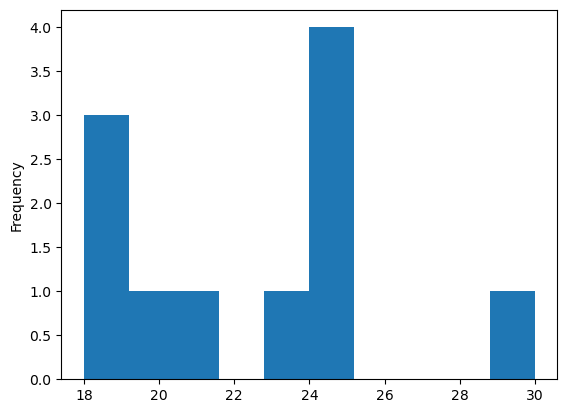

In [36]:
import matplotlib.pyplot as plt
df["course1"].plot(kind = 'hist')

**groupby fucntion:**

The groupby function in pandas is a very useful function for grouping and aggregating data. It allows you to group a DataFrame by one or more columns and apply a function to each group.

For example, consider the following DataFrame:

In [37]:
df3 = pd.DataFrame({'Animal': ['Dog', 'Cat', 'Dog', 'Cat', 'Dog'],
                   'Size': ['Small', 'Small', 'Medium', 'Large', 'Large'],
                   'Weight': [5, 3, 15, 10, 20]})

df3

,Animal,Size,Weight
0,Dog,Small,5
1,Cat,Small,3
2,Dog,Medium,15
3,Cat,Large,10
4,Dog,Large,20


If you want to group the data by the Animal column and calculate the mean weight for each group, you can use the groupby function like this:

In [38]:
df3.groupby('Animal')['Weight'].mean()

Animal
Cat     6.500000
Dog    13.333333
Name: Weight, dtype: float64

You can also group the data by multiple columns and apply multiple functions to each group. For example, to group the data by both the Animal and Size columns and calculate the mean and median weight for each group, you can use the groupby function like this:

In [39]:
df3.groupby(['Animal', 'Size'])['Weight'].agg(['mean', 'median'])

mean  median
Animal Size                
Cat    Large   10.0    10.0
       Small    3.0     3.0
Dog    Large   20.0    20.0
       Medium  15.0    15.0
       Small    5.0     5.0

**Applying more advanced functions:**

In [40]:
import numpy as np

In [41]:
#now this is a nonsense example
#but it shows how to apply a function to all emelents
df = pd.read_csv('data/example.csv', index_col=0)
df.apply(np.sqrt) #note that this won't change df itself, do df=df.apply(...)

,course1,course2,course3,course4
name,,,,
Marie,4.898979,4.242641,5.477226,4.472136
John,4.242641,5.196152,5.385165,5.196152
Kati,4.582576,4.898979,5.291503,5.196152
Olaf,5.477226,5.477226,5.385165,5.477226
Mark,4.898979,5.000000,5.196152,4.582576
Olga,4.795832,5.099020,5.477226,5.477226
Jean,4.242641,5.291503,5.099020,4.898979
Alex,4.358899,4.472136,5.196152,5.196152
Pier,4.898979,5.385165,4.795832,5.099020


You can use your own functions as well:

In [42]:
def myf(x):
    return x+10

In [43]:
df.apply(myf)

,course1,course2,course3,course4
name,,,,
Marie,34,28,40,30
John,28,37,39,37
Kati,31,34,38,37
Olaf,40,40,39,40
Mark,34,35,37,31
Olga,33,36,40,40
Jean,28,38,36,34
Alex,29,30,37,37
Pier,34,39,33,36


Or it works with a lambda:

In [44]:
df.apply(lambda x: x*x)

,course1,course2,course3,course4
name,,,,
Marie,576,324,900,400
John,324,729,841,729
Kati,441,576,784,729
Olaf,900,900,841,900
Mark,576,625,729,441
Olga,529,676,900,900
Jean,324,784,676,576
Alex,361,400,729,729
Pier,576,841,529,676


Just for one column:

In [45]:
df["course1"].apply(lambda x:x*x)

name
Marie     576
John      324
Kati      441
Olaf      900
Mark      576
Olga      529
Jean      324
Alex      361
Pier      576
Bennet    576
Luis      400
Name: course1, dtype: int64

How to apply to a row:

In [46]:
df.loc["Bennet"].apply(lambda x:x*x)

course1    576
course2    625
course3    676
course4    900
Name: Bennet, dtype: int64

In [47]:
df.loc["Bennet"]=df.loc["Bennet"].apply(lambda x:x*x) #to actually change df
print(df)

        course1  course2  course3  course4
name                                      
Marie        24       18       30       20
John         18       27       29       27
Kati         21       24       28       27
Olaf         30       30       29       30
Mark         24       25       27       21
Olga         23       26       30       30
Jean         18       28       26       24
Alex         19       20       27       27
Pier         24       29       23       26
Bennet      576      625      676      900
Luis         20       20       18       18


### **What if we have just a txt file and not a proper csv?**

In [56]:
pd.options.display.max_rows = 5
pd.options.display.max_columns = 5
#just say that the delimter is a space and that there is no header
df = pd.read_csv('data/s3.txt',sep='\\s+', header=None) 
print(df)

           0       1
0     453320  606542
1     520651  594591
...      ...     ...
4998  341057  341338
4999  374464  284441

[5000 rows x 2 columns]


(np.float64(-12770.850000000006),
 np.float64(987807.85),
 np.float64(26137.049999999996),
 np.float64(991187.95))

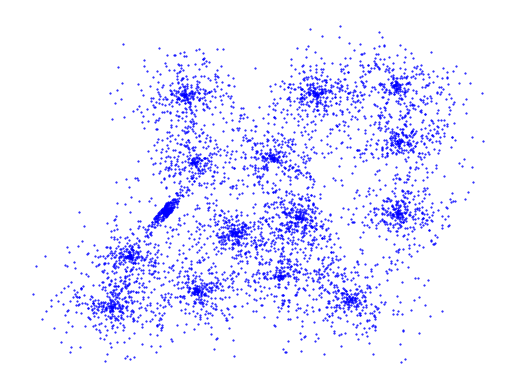

In [49]:
plt.plot(df[0], df[1], "ob",  markersize=0.5)
plt.axis('off')

### **What if I don't want to use pandas, but still have to read data from a file?**

You can use numpy

In [50]:
#specify int or it's going to assume floats
my_data=np.genfromtxt('data/s3.txt',dtype=int)

In [51]:
print(my_data)

[[453320 606542]
 [520651 594591]
 [516664 660290]
 ...
 [351482 334662]
 [341057 341338]
 [374464 284441]]


In [52]:
#format %d is here to print as integers ("decimals")
np.savetxt("saved_test.txt",my_data,fmt='%d')

In [53]:
my_grades=np.genfromtxt('data/example.csv',delimiter=',',skip_header=1)
#yes, there are ways to skip columns as well, but they become ugly, might as well use pandas

In [54]:
print(my_grades)

[[nan 24. 18. 30. 20.]
 [nan 18. 27. 29. 27.]
 [nan 21. 24. 28. 27.]
 [nan 30. 30. 29. 30.]
 [nan 24. 25. 27. 21.]
 [nan 23. 26. 30. 30.]
 [nan 18. 28. 26. 24.]
 [nan 19. 20. 27. 27.]
 [nan 24. 29. 23. 26.]
 [nan 24. 25. 26. 30.]
 [nan 20. 20. 18. 18.]]


Can you read and write files in "pure python" without numpy and pandas? Yes, but it becomes as comppilcated as in C/Fortran, so most times you have no reason to do that, that's why we are not considering that.